SVM Classifier

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
data = pd.read_csv('/content/Accident_survival.csv')
data.head()

,Age,Gender,Speed_of_Impact,Helmet_Used,Seatbelt_Used,Survived
0,56,Female,27,No,No,1
1,69,Female,46,No,Yes,1
2,46,Male,46,Yes,Yes,0
3,32,Male,117,No,Yes,0
4,60,Female,40,Yes,Yes,0


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 6 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Age              200 non-null    int64 
 1   Gender           200 non-null    object
 2   Speed_of_Impact  200 non-null    int64 
 3   Helmet_Used      200 non-null    object
 4   Seatbelt_Used    200 non-null    object
 5   Survived         200 non-null    int64 
dtypes: int64(3), object(3)
memory usage: 9.5+ KB


In [4]:
data.shape

(200, 6)

In [5]:
data.describe()

,Age,Speed_of_Impact,Survived
count,200.00000,200.00000,200.00000
mean,43.42500,70.68500,0.50500
std,14.94191,30.25197,0.50123
min,18.00000,20.00000,0.00000
25%,31.00000,43.00000,0.00000
50%,43.50000,71.50000,1.00000
75%,56.00000,97.50000,1.00000
max,69.00000,120.00000,1.00000


In [14]:
data['Gender'] = data['Gender'].replace({'Male':1,'Female':0})
data['Helmet_Used'] = data['Helmet_Used'].replace({'Yes':1,'No':0})
data['Seatbelt_Used'] = data['Seatbelt_Used'].replace({'Yes':1,'No':0})
data.head()

,Age,Gender,Speed_of_Impact,Helmet_Used,Seatbelt_Used,Survived
0,56,0,27,0,0,1
1,69,0,46,0,1,1
2,46,1,46,1,1,0
3,32,1,117,0,1,0
4,60,0,40,1,1,0


In [15]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
col_names = data.columns
scaled_data = pd.DataFrame(scaler.fit_transform(data),columns = col_names)
scaled_data.head()

,Age,Gender,Speed_of_Impact,Helmet_Used,Seatbelt_Used,Survived
0,0.843704,-0.895434,-1.447662,-1.116777,-1.116777,0.990050
1,1.715924,-0.895434,-0.818028,-1.116777,0.895434,0.990050
2,0.172767,1.116777,-0.818028,0.895434,0.895434,-1.010051
3,-0.766547,1.116777,1.534817,-1.116777,0.895434,-1.010051
4,1.112080,-0.895434,-1.016859,0.895434,0.895434,-1.010051


In [27]:
# Select only the features to be scaled
features_to_scale = data.columns.difference(['Survived'])

# Apply scaling to the selected features
scaler = StandardScaler()
scaled_data = pd.DataFrame(scaler.fit_transform(data[features_to_scale]), columns=features_to_scale, index=data.index)

# Concatenate the scaled features with the original 'Survived' column
scaled_data = pd.concat([scaled_data, data['Survived']], axis=1)

# Proceed with train-test split and model training
x = scaled_data.drop('Survived', axis=1)
y = scaled_data['Survived']


In [28]:
x = scaled_data.drop('Survived',axis = 1)
y = scaled_data['Survived']

In [29]:
#Train Test Split
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = 0.2,random_state = 42)

In [30]:
x_train.shape

(160, 5)

In [31]:
x_test.shape

(40, 5)

In [32]:
y_train.shape

(160,)

In [33]:
y_test.shape

(40,)

In [34]:
from sklearn.svm import SVC

In [44]:
c1 = SVC(kernel = 'linear',probability= True, random_state = 5)
c1.fit(x_train,y_train)
y_pred_test1 = c1.predict(x_test)

In [45]:
c2 = SVC(kernel = 'rbf',probability= True, random_state = 5)
c2.fit(x_train,y_train)
y_pred_test2 = c2.predict(x_test)

In [46]:
c3 = SVC(kernel = 'poly',degree = 3,probability= True, random_state = 5)
c3.fit(x_train,y_train)
y_pred_test3 = c3.predict(x_test)

In [47]:
c4 = SVC(kernel = 'rbf',gamma = 2, probability= True, random_state = 5)
c4.fit(x_train,y_train)
y_pred_test4 = c4.predict(x_test)

In [48]:
c5 = SVC(kernel = 'rbf',gamma = 10,C =10,  probability= True, random_state = 5)
c5.fit(x_train,y_train)
y_pred_test5 = c5.predict(x_test)

In [50]:
from sklearn import metrics
print("Accuracy with linear kernel :",metrics.accuracy_score(y_test, y_pred_test1))
print("Accuracy with rbf kernel :",metrics.accuracy_score(y_test, y_pred_test2))
print("Accuracy with poly kernel :",metrics.accuracy_score(y_test, y_pred_test3))
print("Accuracy with rbf kernel and gamma = 2 :",metrics.accuracy_score(y_test, y_pred_test4))
print("Accuracy with rbf kernel and gamma = 10 and C = 10 :",metrics.accuracy_score(y_test, y_pred_test5))

Accuracy with linear kernel : 0.475
Accuracy with rbf kernel : 0.45
Accuracy with poly kernel : 0.5
Accuracy with rbf kernel and gamma = 2 : 0.425
Accuracy with rbf kernel and gamma = 10 and C = 10 : 0.425


In [52]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [53]:
cm1 = confusion_matrix(y_test,y_pred_test1)
cm2 = confusion_matrix(y_test,y_pred_test2)
cm3 = confusion_matrix(y_test,y_pred_test3)
cm4 = confusion_matrix(y_test,y_pred_test4)
cm5 = confusion_matrix(y_test,y_pred_test5)

In [54]:
cm1

array([[15,  7],
       [14,  4]])

In [55]:
cm2

array([[13,  9],
       [13,  5]])

In [56]:
cm3

array([[14,  8],
       [12,  6]])

In [57]:
cm4

array([[10, 12],
       [11,  7]])

In [59]:
cm5

array([[ 7, 15],
       [ 8, 10]])

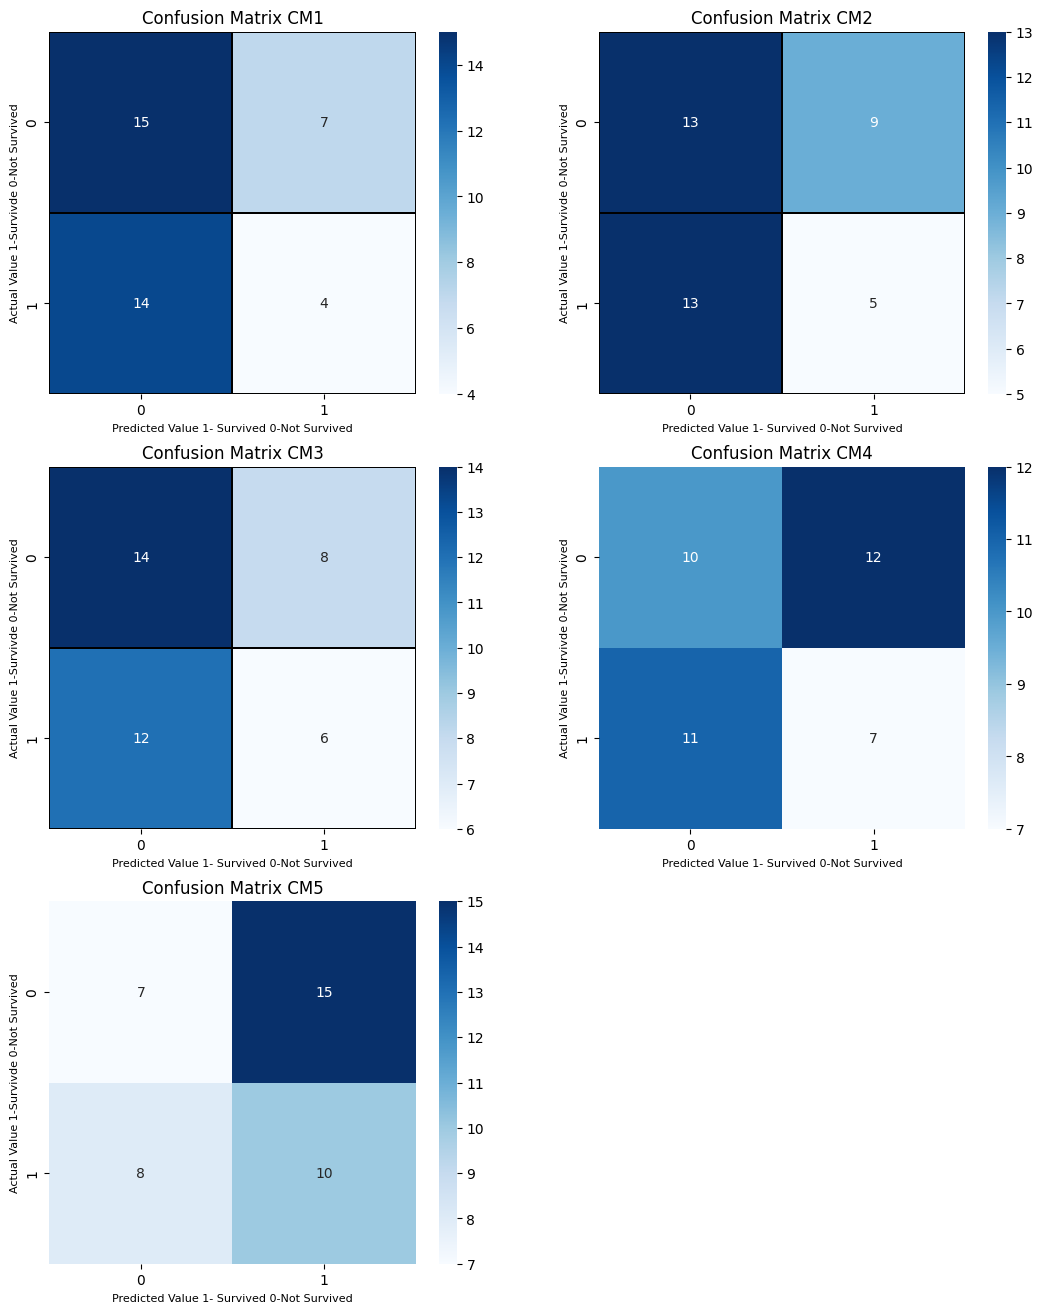

In [65]:
plt.figure(figsize = (13,16))
plt.subplot(3,2,1)
sns.heatmap(cm1,annot = True,cmap = 'Blues',linewidth = 0.3, linecolor = 'black', fmt = 'g')
plt.xlabel('Predicted Value 1- Survived 0-Not Survived', fontsize = 8)
plt.ylabel('Actual Value 1-Survivde 0-Not Survived', fontsize = 8)
plt.title('Confusion Matrix CM1')
plt.subplot(3,2,2)
sns.heatmap(cm2,annot = True,cmap = 'Blues',linewidth = 0.3, linecolor = 'black', fmt = 'g')
plt.xlabel('Predicted Value 1- Survived 0-Not Survived', fontsize = 8)
plt.ylabel('Actual Value 1-Survivde 0-Not Survived', fontsize = 8)
plt.title('Confusion Matrix CM2')
plt.subplot(3,2,3)
sns.heatmap(cm3,annot = True,cmap = 'Blues',linewidth = 0.3, linecolor = 'black', fmt = 'g')
plt.xlabel('Predicted Value 1- Survived 0-Not Survived', fontsize = 8)
plt.ylabel('Actual Value 1-Survivde 0-Not Survived', fontsize = 8)
plt.title('Confusion Matrix CM3')
plt.subplot(3,2,4)
sns.heatmap(cm4,annot = True,cmap = 'Blues',linewidth = 0, linecolor = 'black', fmt = 'g')
plt.xlabel('Predicted Value 1- Survived 0-Not Survived', fontsize = 8)
plt.ylabel('Actual Value 1-Survivde 0-Not Survived', fontsize = 8)
plt.title('Confusion Matrix CM4')
plt.subplot(3,2,5)
sns.heatmap(cm5,annot = True,cmap = 'Blues',linewidth = 0, linecolor = 'black', fmt = 'g')
plt.xlabel('Predicted Value 1- Survived 0-Not Survived', fontsize = 8)
plt.ylabel('Actual Value 1-Survivde 0-Not Survived', fontsize = 8)
plt.title('Confusion Matrix CM5')
plt.show()

In [66]:
train_score = c1.score(x_train,y_train)
test_score = c1.score(x_test,y_test)
print("Training Score :",train_score)
print("Testing Score :",test_score)

Training Score : 0.58125
Testing Score : 0.475


In [106]:
print('SVC Linear Kernel Classification Report:\n',classification_report(y_test,y_pred_test1))
print('Training Score:{0:.2}'.format(train_score))
print('Testing Score:{0:.2}'.format(test_score))

SVC Linear Kernel Classification Report:
               precision    recall  f1-score   support

           0       0.52      0.68      0.59        22
           1       0.36      0.22      0.28        18

    accuracy                           0.47        40
   macro avg       0.44      0.45      0.43        40
weighted avg       0.45      0.47      0.45        40

Training Score:1.0
Testing Score:0.42


In [80]:
train_score = c2.score(x_train,y_train)
test_score = c2.score(x_test,y_test)
print("Training Score :",train_score)
print("Testing Score :",test_score)

Training Score : 0.70625
Testing Score : 0.45


In [105]:
print('SVC Default RBF Kernel Classification Report:\n', classification_report(y_test,y_pred_test2))
print('Training Score:{0:.2}'.format(train_score))
print('Testing Score:{0:.2}'.format(test_score))

SVC Default RBF Kernel Classification Report:
               precision    recall  f1-score   support

           0       0.50      0.59      0.54        22
           1       0.36      0.28      0.31        18

    accuracy                           0.45        40
   macro avg       0.43      0.43      0.43        40
weighted avg       0.44      0.45      0.44        40

Training Score:1.0
Testing Score:0.42


In [76]:
train_score = c3.score(x_train,y_train)
test_score = c3.score(x_test,y_test)
print("Training Score :",train_score)
print("Testing Score :",test_score)

Training Score : 0.625
Testing Score : 0.5


In [104]:
print('SVC Poly_3 Kernel Classification Report:\n', classification_report(y_test,y_pred_test3))
print('Training Score:{0:.2}'.format(train_score))
print('Testing Score:{0:.2}'.format(test_score))

SVC Poly_3 Kernel Classification Report:
               precision    recall  f1-score   support

           0       0.54      0.64      0.58        22
           1       0.43      0.33      0.38        18

    accuracy                           0.50        40
   macro avg       0.48      0.48      0.48        40
weighted avg       0.49      0.50      0.49        40

Training Score:1.0
Testing Score:0.42


In [87]:
train_score = c4.score(x_train,y_train)
test_score = c4.score(x_test,y_test)
print("Training Score :",train_score)
print("Testing Score :",test_score)

Training Score : 0.89375
Testing Score : 0.425


In [103]:
print('SVC RBF WITH LOW GAMMA AND C KERNEL CLASSIFICATION REPORT:\n', classification_report(y_test,y_pred_test4))
print('Training Score:{0:.2}'.format(train_score))
print('Testing Score:{0:.2}'.format(test_score))


SVC RBF WITH LOW GAMMA AND C KERNEL CLASSIFICATION REPORT:
               precision    recall  f1-score   support

           0       0.48      0.45      0.47        22
           1       0.37      0.39      0.38        18

    accuracy                           0.42        40
   macro avg       0.42      0.42      0.42        40
weighted avg       0.43      0.42      0.43        40

Training Score:1.0
Testing Score:0.42


In [90]:
train_score = c5.score(x_train,y_train)
test_score = c5.score(x_test,y_test)
print("Training Score :",train_score)
print("Testing Score :",test_score)

Training Score : 1.0
Testing Score : 0.425


In [107]:
print('SVC RBF WITH HIGH GAMMA AND C KERNEL CLASSIFICATION REPORT:\n', classification_report(y_test,y_pred_test5))
print('Training Score:{0:.2}'.format(train_score))
print('Testing Score:{0:.2}'.format(test_score))

SVC RBF WITH HIGH GAMMA AND C KERNEL CLASSIFICATION REPORT:
               precision    recall  f1-score   support

           0       0.47      0.32      0.38        22
           1       0.40      0.56      0.47        18

    accuracy                           0.42        40
   macro avg       0.43      0.44      0.42        40
weighted avg       0.44      0.42      0.42        40

Training Score:1.0
Testing Score:0.42


In [92]:
from sklearn.metrics import roc_curve, roc_auc_score

In [108]:
prob1 = c1.predict_proba(x_test)
prob2 = c2.predict_proba(x_test)
prob3 = c3.predict_proba(x_test)
prob4 = c4.predict_proba(x_test)
prob5 = c5.predict_proba(x_test)

In [109]:
auc1 = roc_auc_score(y_test,y_pred_test1)
auc2 = roc_auc_score(y_test,y_pred_test2)
auc3 = roc_auc_score(y_test,y_pred_test3)
auc4 = roc_auc_score(y_test,y_pred_test4)
auc5 = roc_auc_score(y_test,y_pred_test5)
print("Area under curve for Linear Kernel SVM Classifier:{:.2f}".format(auc1))
print("Area under curve for RBF Kernel SVM Classifier:{:.2f}".format(auc2))
print("Area under curve for Poly Kernel SVM Classifier:{:.2f}".format(auc3))
print("Area under curve for RBF Kernel SVM Classifier with low gamma:{:.2f}".format(auc4))
print("Area under curve for RBF Kernel SVM Classifier with high gamma:{:.2f}".format(auc5))

Area under curve for Linear Kernel SVM Classifier:0.45
Area under curve for RBF Kernel SVM Classifier:0.43
Area under curve for Poly Kernel SVM Classifier:0.48
Area under curve for RBF Kernel SVM Classifier with low gamma:0.42
Area under curve for RBF Kernel SVM Classifier with high gamma:0.44


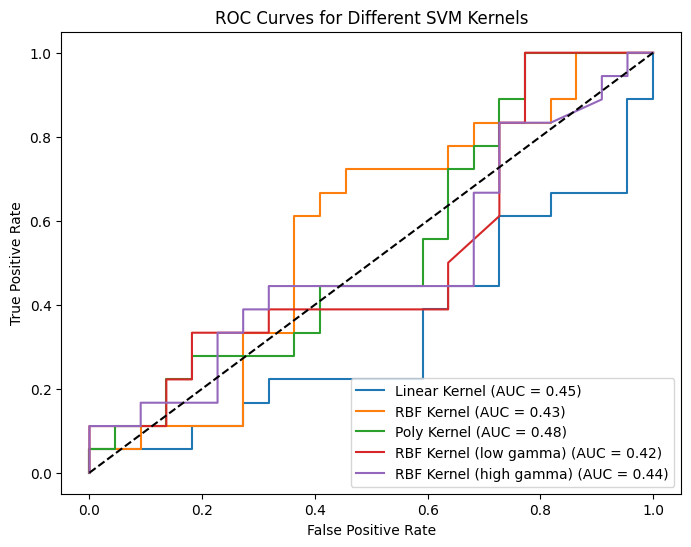

In [114]:
fpr1, tpr1,thresh1 = roc_curve(y_test, prob1[:, 1],pos_label = 1)
fpr2, tpr2,thresh2 = roc_curve(y_test, prob2[:, 1],pos_label = 1)
fpr3, tpr3,thresh3 = roc_curve(y_test, prob3[:, 1],pos_label = 1)
fpr4, tpr4,thresh4 = roc_curve(y_test, prob4[:, 1],pos_label = 1)
fpr5, tpr5,thresh5 = roc_curve(y_test, prob5[:, 1],pos_label = 1)

plt.figure(figsize=(8, 6))
plt.plot(fpr1, tpr1, label='Linear Kernel (AUC = {:.2f})'.format(auc1))
plt.plot(fpr2, tpr2, label='RBF Kernel (AUC = {:.2f})'.format(auc2))
plt.plot(fpr3, tpr3, label='Poly Kernel (AUC = {:.2f})'.format(auc3))
plt.plot(fpr4, tpr4, label='RBF Kernel (low gamma) (AUC = {:.2f})'.format(auc4))
plt.plot(fpr5, tpr5, label='RBF Kernel (high gamma) (AUC = {:.2f})'.format(auc5))
plt.plot([0, 1], [0, 1], 'k--')  # Diagonal line representing random guessing
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curves for Different SVM Kernels')
plt.legend(loc='lower right')
plt.show()